# Содержание

## Описательный анализ данных

1. Анализ контрольной и тестовой группы
2. Построение графиков

## Расчет метрик

1. Расчет метрик конверсии контрольной группы
2. Расчет среднего дохода контрольной группы
3. Расчет средней временной сессии контрольной группы

4. Расчет метрик конверсии тестовой группы
5. Расчет среднего дохода тестовой группы
6. Расчет средней временной сессии тестовой группы

## Проведение A/B тестов

7. Выдвижение гипотез
8. Проведение A/B тестов

## Выводы


















## Описание данных

<b>Синтетические данные для анализа продаж в интерент - магазине</b>

<b>Задача:</b> Проанализировать датасет и провестити A/B тесты для выявления различий между старой и новой рекомендательной системой.

Столбцы датасета:

user_id: уникальный идентификатор пользователя

group: столбец контрольная/тесовая группа

visited_homepage: зашел ли пользователь на главную страницу (0/1)

clicked_recommendation: кликнул ли на рекомендательный товар (0/1)

added_to_cart: Добавил ли рекомендательный товар в корзину (0/1)

purchased: был ли выкуплен товар (0/1)

purchase_amount: сумма покупки

session_duration_sec: длительной сессии проведенной в оналйн - магазине (секунды) 

device: устройство с которого пользователь посещал магазин (mobile/desktop)

user_category: категория пользователя (loyal/new/returning)

# Описательный анализ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats

In [2]:
data = pd.read_csv(r'ab_test_recommendations.csv')
data

,user_id,group,visited_homepage,clicked_recommendation,added_to_cart,purchased,purchase_amount,session_duration_sec,device,user_category
0,1,Control,0,0,0,0,0,342,mobile,loyal
1,2,Test,1,0,0,0,0,548,desktop,new
2,3,Control,1,0,0,0,0,235,mobile,new
3,4,Control,1,0,0,0,0,404,mobile,new
4,5,Control,1,1,1,0,0,480,mobile,new
...,...,...,...,...,...,...,...,...,...,...
1995,1996,Control,1,1,0,0,0,155,desktop,new
1996,1997,Test,0,0,0,0,0,442,desktop,new
1997,1998,Control,1,0,0,0,0,528,desktop,returning
1998,1999,Control,1,0,0,0,0,454,desktop,new


In [3]:
data.isnull().sum()

user_id                   0
group                     0
visited_homepage          0
clicked_recommendation    0
added_to_cart             0
purchased                 0
purchase_amount           0
session_duration_sec      0
device                    0
user_category             0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   user_id                 2000 non-null   int64 
 1   group                   2000 non-null   object
 2   visited_homepage        2000 non-null   int64 
 3   clicked_recommendation  2000 non-null   int64 
 4   added_to_cart           2000 non-null   int64 
 5   purchased               2000 non-null   int64 
 6   purchase_amount         2000 non-null   int64 
 7   session_duration_sec    2000 non-null   int64 
 8   device                  2000 non-null   object
 9   user_category           2000 non-null   object
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [5]:
data_group = data['group'].value_counts().to_frame().T 
data_group

group,Control,Test
count,1016,984


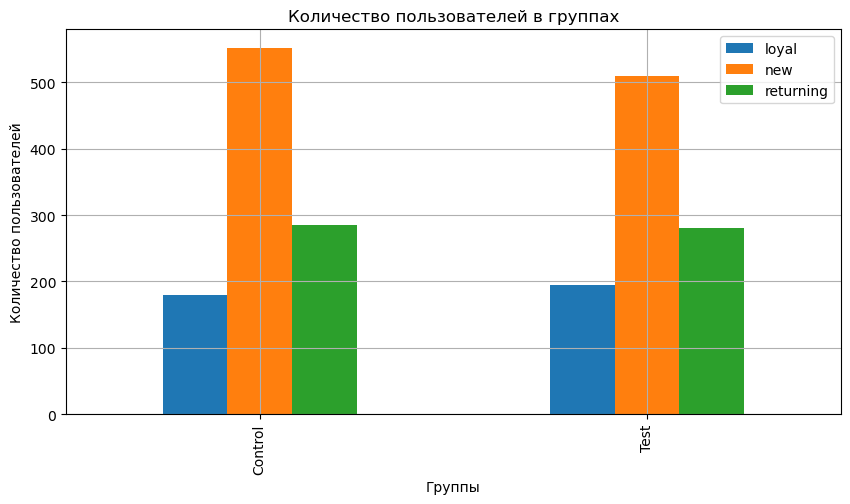

In [6]:
data_user_category = data.groupby(['group', 'user_category'])['user_category'].count().unstack()
data_user_category.plot(kind='bar', figsize=(10, 5))

plt.legend(loc='upper right')  # или просто plt.legend()

# Дополнительные настройки
plt.xlabel('Группы')
plt.ylabel('Количество пользователей')
plt.title('Количество пользователей в группах')
plt.grid(True)
plt.show()

Категория пользователей в контрольной и тестовой группе примерно одинаково

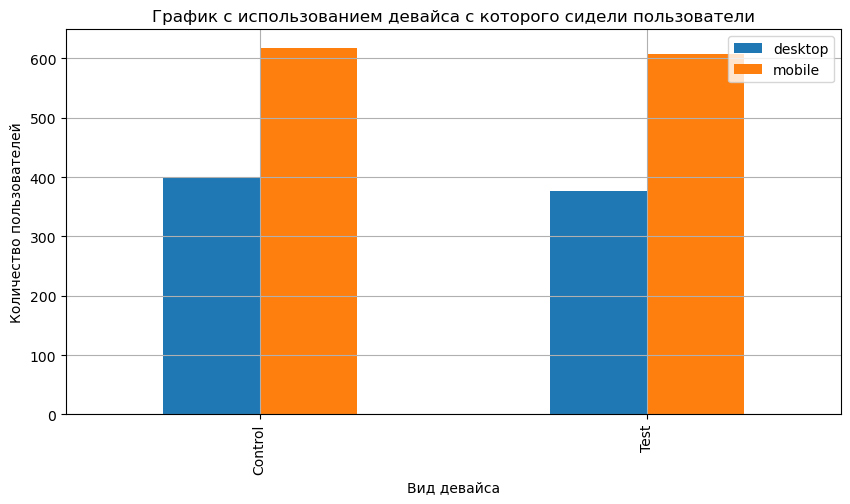

In [7]:
data_device = data.groupby(['group', 'device'])['device'].count().unstack()
data_device.plot(kind='bar', figsize=(10, 5))

plt.legend(loc='upper right')  # или просто plt.legend()

# Дополнительные настройки
plt.xlabel('Вид девайса')
plt.ylabel('Количество пользователей')
plt.title('График с использованием девайса с которого сидели пользователи')
plt.grid(True)
plt.show()

Количество пользователей, которые пользовались магазином в тестовой и контрольной группе примерно одинаково

In [8]:
data_device_user_mobile = data.groupby(['group', 'user_category', 'device'])['device'].count().unstack()
data_device_user_mobile

device                 desktop  mobile
group   user_category                 
Control loyal               75     104
        new                215     337
        returning          108     177
Test    loyal               72     123
        new                187     322
        returning          118     162

Большинство пользователей предпочитают посещать магазин через мобильные устройства.
У новых пользователей больше всего посещений через мобильные устройства. Возвращающиеся пользователи на втором месте по использованию мобильных телефонов для соврешения покупок в онлайн магазине. 

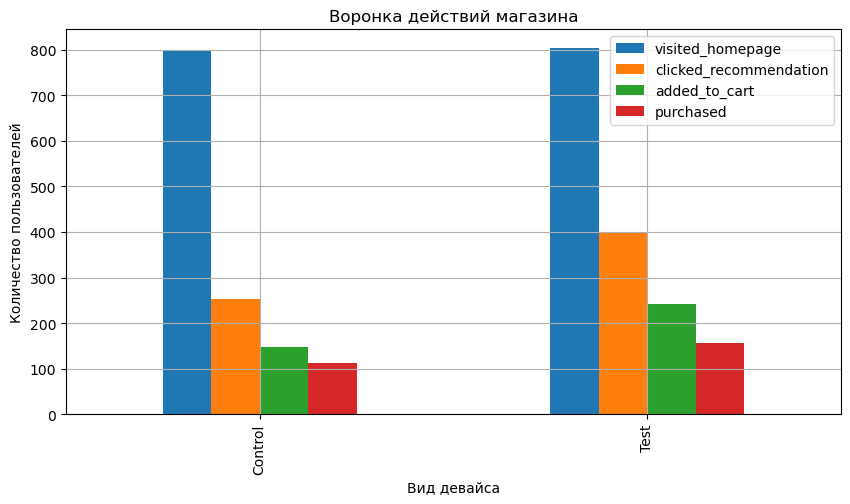

In [9]:
data_funnel = data.groupby('group')[['visited_homepage', 'clicked_recommendation', 'added_to_cart', 'purchased']].sum()
data_funnel.plot(kind='bar', figsize=(10, 5))

plt.legend(loc='upper right')  # или просто plt.legend()

# Дополнительные настройки
plt.xlabel('Вид девайса')
plt.ylabel('Количество пользователей')
plt.title('Воронка действий магазина')
plt.grid(True)
plt.show()

После пременения новой рекомендательной системы увеличилось количетсво кликов по рекомендательным товарам, увеличилось количество добавлений товаров в корзину, а также увеличось количество продаж.

# Расчет метрик

<b>Конверсия контрольной группы</b>

In [10]:
data_control_conv = data[data['group'] == 'Control']
conv1 = (data_control_conv['purchased'].sum() / data_control_conv['visited_homepage'].sum()) * 100
conv2 = (data_control_conv['added_to_cart'].sum() / data_control_conv['visited_homepage'].sum()) * 100
conv3 = (data_control_conv['clicked_recommendation'].sum() / data_control_conv['visited_homepage'].sum()) * 100

print(f"Конверсия из просмотра главной страницы в клик товаров из рекомендаций: {conv3:.2f}%")
print(f"Конверсия из просмотра главной страницы в добавление товаров в корзину: {conv2:.2f}%")
print(f"Конверсия из просмотра главной страницы в оформление заказа: {conv1:.2f}%")

Конверсия из просмотра главной страницы в клик товаров из рекомендаций: 31.75%
Конверсия из просмотра главной страницы в добавление товаров в корзину: 18.50%
Конверсия из просмотра главной страницы в оформление заказа: 14.12%


В контрольной выборке со старой рекомендательной системой с главной страницы до оформления заказа доходят 14.12% пользователей

In [11]:
# Данные тестовой группы
data_control = data[data['group'] == 'Control']

# 1. Кликнули на рекомендацию / зашли на главную
conv_view_to_click = (data_control['clicked_recommendation'].sum() / data_control['visited_homepage'].sum()) * 100

# 2. Добавили в корзину / кликнули на рекомендацию
conv_click_to_cart = (data_control['added_to_cart'].sum() / data_control['clicked_recommendation'].sum()) * 100

# 3. Купили / добавили в корзину
conv_cart_to_purchase = (data_control['purchased'].sum() / data_control['added_to_cart'].sum()) * 100

print("Контрольная группа ():")
print(f"Главная → Клик: {conv_view_to_click:.1f}%")
print(f"Клик → Корзина: {conv_click_to_cart:.1f}%")
print(f"Корзина → Покупка: {conv_cart_to_purchase:.1f}%")

Контрольная группа ():
Главная → Клик: 31.8%
Клик → Корзина: 58.3%
Корзина → Покупка: 76.4%


31.8% просматирвают товары предложенные рекомендованные системой, из этих 31.8% , 58.3% добовляют рекомендованный заказ в корзину, а 76.4% из 58.3% выкупают товар.

In [12]:
# Средний доход с одного платящего
ARPPU = data_control_conv['purchase_amount'].sum() / data_control_conv['purchased'].sum()
# Доля пользователей в контрольной группе кто совершил покупку
CR = data_control_conv['purchased'].sum() / len(data_control_conv)
ARPU = ARPPU  * CR
print(f"Средний доход с одного пользователя в контрольной группе: {ARPU}")

Средний доход с одного пользователя в контрольной группе: 561.3080708661417


<b>Средний доход в контрольной группе с каждой категории клиентов</b>

In [13]:
user_new = data_control[data_control['user_category'] == 'new']
ARPPU = user_new['purchase_amount'].sum() / user_new['purchased'].sum()
# Доля пользователей в контрольной группе кто совершил покупку
CR = user_new['purchased'].sum() / len(user_new)
ARPU = ARPPU  * CR
print(f"Средний доход с одного пользователя в контрольной группе (новые пользователи): {ARPU}")

Средний доход с одного пользователя в контрольной группе (новые пользователи): 614.9239130434783


In [14]:
user_loyal = data_control[data_control['user_category'] == 'loyal']
ARPPU = user_loyal['purchase_amount'].sum() / user_loyal['purchased'].sum()
# Доля пользователей в контрольной группе кто совершил покупку
CR = user_loyal['purchased'].sum() / len(user_loyal)
ARPU = ARPPU  * CR
print(f"Средний доход с одного пользователя в контрольной группе (лояльные пользователи): {ARPU}")

Средний доход с одного пользователя в контрольной группе (лояльные пользователи): 430.67597765363126


In [15]:
user_returning = data_control[data_control['user_category'] == 'returning']
ARPPU = user_returning['purchase_amount'].sum() / user_returning['purchased'].sum()
# Доля пользователей в контрольной группе кто совершил покупку
CR = user_returning['purchased'].sum() / len(user_returning)
ARPU = ARPPU  * CR
print(f"Средний доход с одного пользователя в контрольной группе (возвращающиеся пользователи): {ARPU}")

Средний доход с одного пользователя в контрольной группе (возвращающиеся пользователи): 539.5087719298247


<b>Анализ временной сессии контрольной группы</b>

In [16]:
data_control = data[data['group'] == 'Control']
print(f'Среднее экранное время контрольной группы проведенное в интерент магазине {data_control['session_duration_sec'].mean():.2f}')

Среднее экранное время контрольной группы проведенное в интерент магазине 319.57


In [17]:
data_control = data[data['group'] == 'Control']
data_mean_time_device = data_control.groupby('device')['session_duration_sec'].mean()
print(f"Среднее экранное время контрольной группы проведенное в интерент магазине с разных устройств")
data_mean_time_device

Среднее экранное время контрольной группы проведенное в интерент магазине с разных устройств


device
desktop    319.165829
mobile     319.836570
Name: session_duration_sec, dtype: float64

In [18]:
data_control = data[data['group'] == 'Control']
data_mean_time_device_users = data_control.groupby(['user_category', 'device'])['session_duration_sec'].mean().unstack()
print("Среденее экранное время для всех категорий пользователя с разных устройств") 
data_mean_time_device_users

Среденее экранное время для всех категорий пользователя с разных устройств


device,desktop,mobile
user_category,,
loyal,318.786667,314.682692
new,324.739535,317.338279
returning,308.333333,327.621469


<b>Конверсия тестовой группы</b>

In [19]:
data_test_conv = data[data['group'] == 'Test']
conv1 = (data_test_conv['purchased'].sum() / data_test_conv['visited_homepage'].sum()) * 100
conv2 = (data_test_conv['added_to_cart'].sum() / data_test_conv['visited_homepage'].sum()) * 100
conv3 = (data_test_conv['clicked_recommendation'].sum() / data_test_conv['visited_homepage'].sum()) * 100

print(f"Конверсия из просмотра главной страницы в клик товаров из рекомендаций: {conv3:.2f}%")
print(f"Конверсия из просмотра главной страницы в добавление товаров в корзину: {conv2:.2f}%")
print(f"Конверсия из просмотра главной страницы в оформление заказа: {conv1:.2f}%")

Конверсия из просмотра главной страницы в клик товаров из рекомендаций: 49.75%
Конверсия из просмотра главной страницы в добавление товаров в корзину: 29.98%
Конверсия из просмотра главной страницы в оформление заказа: 19.53%


В контрольной выборке со старой рекомендательной системой с главной страницы до оформления заказа доходят 19.53% пользователей

In [20]:
# Данные тестовой группы
data_test = data[data['group'] == 'Test']

# 1. Кликнули на рекомендацию / зашли на главную
conv_view_to_click = (data_test['clicked_recommendation'].sum() / data_test['visited_homepage'].sum()) * 100

# 2. Добавили в корзину / кликнули на рекомендацию
conv_click_to_cart = (data_test['added_to_cart'].sum() / data_test['clicked_recommendation'].sum()) * 100

# 3. Купили / добавили в корзину
conv_cart_to_purchase = (data_test['purchased'].sum() / data_test['added_to_cart'].sum()) * 100

print("Тестовая группа (B):")
print(f"Главная → Клик: {conv_view_to_click:.1f}%")
print(f"Клик → Корзина: {conv_click_to_cart:.1f}%")
print(f"Корзина → Покупка: {conv_cart_to_purchase:.1f}%")

Тестовая группа (B):
Главная → Клик: 49.8%
Клик → Корзина: 60.2%
Корзина → Покупка: 65.1%


После внедрения новой рекомендательной системы, 49.8% просматирвают товары предложенные новой рекомендованные системой, из этих 49.8% , 60.2% добовляют рекомендованный заказ в корзину, а 65.1% из 60.2% выкупают товар.


<b>Средний доход в тестовой группе с каждой категории клиентов</b>

In [21]:
# Средний доход с одного платящего
ARPPU = data_test_conv['purchase_amount'].sum() / data_test_conv['purchased'].sum()
# Доля пользователей в контрольной группе кто совершил покупку
CR = data_test_conv['purchased'].sum() / len(data_test_conv)
ARPU = ARPPU  * CR
print(f"Средний доход с одного пользователя: в тестовой группе {ARPU}")

Средний доход с одного пользователя: в тестовой группе 793.9705284552846


In [22]:
user_new = data_test[data_test['user_category'] == 'new']
ARPPU = user_new['purchase_amount'].sum() / user_new['purchased'].sum()
# Доля пользователей в контрольной группе кто совершил покупку
CR = user_new['purchased'].sum() / len(user_new)
ARPU = ARPPU  * CR
print(f"Средний доход с одного пользователя в тестовой группе (новые пользователи): {ARPU}")

Средний доход с одного пользователя в тестовой группе (новые пользователи): 841.795677799607


In [23]:
user_returning = data_test[data_test['user_category'] == 'returning']
ARPPU = user_returning['purchase_amount'].sum() / user_returning['purchased'].sum()
# Доля пользователей в контрольной группе кто совершил покупку
CR = user_returning['purchased'].sum() / len(user_returning)
ARPU = ARPPU  * CR
print(f"Средний доход с одного пользователя в тестовой группе (возвращающиеся пользователи): {ARPU}")

Средний доход с одного пользователя в тестовой группе (возвращающиеся пользователи): 703.3071428571428


In [24]:
user_loyal = data_test[data_test['user_category'] == 'loyal']
ARPPU = user_loyal['purchase_amount'].sum() / user_loyal['purchased'].sum()
# Доля пользователей в контрольной группе кто совершил покупку
CR = user_loyal['purchased'].sum() / len(user_loyal)
ARPU = ARPPU  * CR
print(f"Средний доход с одного пользователя в тестовой группе (лояльные пользователи): {ARPU}")

Средний доход с одного пользователя в тестовой группе (лояльные пользователи): 799.3179487179488


<b>Анализ временной сессии тестовой группы</b>

In [25]:
data_test = data[data['group'] == 'Test']
print(f'Среднее экранное время контрольной группы проведенное в интерент магазине {data_test['session_duration_sec'].mean():.2f}')

Среднее экранное время контрольной группы проведенное в интерент магазине 316.90


In [26]:
data_test = data[data['group'] == 'Test']
data_mean_time_device = data_test.groupby('device')['session_duration_sec'].mean()
print(f"Среднее экранное время тестовой группе проведенное в интерент магазине с разных устройств")
data_mean_time_device

Среднее экранное время тестовой группе проведенное в интерент магазине с разных устройств


device
desktop    317.830239
mobile     316.319605
Name: session_duration_sec, dtype: float64

In [27]:
data_test = data[data['group'] == 'Test']
data_mean_time_device_users = data_test.groupby(['user_category', 'device'])['session_duration_sec'].mean().unstack()
print("Среденее экранное время для всех категорий пользователя с разных устройств") 
data_mean_time_device_users

Среденее экранное время для всех категорий пользователя с разных устройств


device,desktop,mobile
user_category,,
loyal,318.583333,298.227642
new,329.122995,324.236025
returning,299.474576,314.320988


<b>Вывод: </b>после внедрения новой рекомендательной системы у нас повысилась конверсия кликов по рекомендованным товарам на 17.95%. Повысилась конверсия добавления товара в корзину на 1.9%. <b>Упала конверсия покупок на 11.3%</b>  


Средний доход с каждой категории клиентов увеличился после внедрения новой рекомендательной системы:

- Средний доход среди новых пользователей увеличился на 226.9 рублей
- Средний доход среди лояльных пользователей увеличился на 368.7 рублей
- Средний доход среди возвращающихся пользователей увеличился на 163.8 рублей


Среднее время временной сессии практически не изменился до и после внедрения новой рекомендательной системы

Видим увеличения среденего дохода на пользователя и на категорию клиентов после внедрения новой рекомендательной системы.

# A/B тесты

## Формирование гипотез

<b>Проведение A/B тестов</b>

Насколько стат. значимы наши результаты проведенного нами анализа?

1. <b>Проверим стат значим ли средний доход на пользователя до и после внедрения новой рекомендательной системы</b>

<b>H0:</b> Внедрение новой рекомендательной системы в среднем не повысила доходность

<b>H1:</b> Внедрение новой рекомендательной системы в среднем повысила доходность

<b>Выбор статистического теста</b>

T-test

<b>Условия T-test:</b> 
- Нормальное распределение контрольной/тестовой группы
- Равенство дисперсий контрольная/тестовая группа

In [28]:
data_control = data[data['group'] == 'Control']
data_test = data[data['group'] == 'Test']
# Проверка нормальности
_, p_before = stats.shapiro(data_control['purchase_amount'])
_, p_after = stats.shapiro(data_test['purchase_amount'])
print(f"P-значения теста Шапиро-Уилка: {p_before:.3f} (до), {p_after:.3f} (после)")

# Проверка равенства дисперсий
_, p_var = stats.levene(data_control['purchase_amount'], data_test['purchase_amount'])
print(f"P-значение теста Ливена: {p_var:.3f}")

P-значения теста Шапиро-Уилка: 0.000 (до), 0.000 (после)
P-значение теста Ливена: 0.010


Нарушены оба условия, применять T-test <b>нельзя</b>, в таком случае альтернативой служит непараметрический тест Манна-Уитни

Тест Манна-Уитни

In [29]:
u_stat, p_mann = stats.mannwhitneyu(
    data_test['purchase_amount'], 
    data_control['purchase_amount'],
    alternative='greater'  # односторонняя альтернатива, так как проверяем повысился ли доход после внедрения новой системы
)

print(f"\nРезультаты теста Манна-Уитни:")
print(f"U-статистика = {u_stat:.1f}")
print(f"P-значение = {p_mann:.4f}")

# Критическое значение при alpha=0.05
alpha = 0.05
if p_mann < alpha:
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не отвергаем H0: разница не значима")


Результаты теста Манна-Уитни:
U-статистика = 523895.0
P-значение = 0.0009
Отвергаем H0: разница статистически значима


In [30]:
from statsmodels.stats.power import TTestIndPower

effect_size = 0.2
alpha = 0.05      
nobs1 = len(data_control)  
nobs2 = len(data_test)     
ratio = nobs2 / nobs1      

analysis = TTestIndPower()
power = analysis.solve_power(effect_size=effect_size, nobs1=nobs1, alpha=alpha, ratio=ratio)

print(f"Мощность теста: {power:.3f}")

Мощность теста: 0.994


<b>Вывод:</b> новая рекомендательная система всреднем увеличила доход

2. <b>Проверим стат значимо ли среднее экранное время проведенное пользователем до и после внедрения новой рекомендательной системы</b>

<b>H0:</b> Внедрение новой рекомендательной системы не увеличила экранное время пользователя после внедрения системы

<b>H1:</b> Внедрение новой рекомендательной системы увеличило экранное время пользователей после внедрения системы

<b>Выбор статистического теста</b>

T-test

<b>Условия T-test:</b> 
- Нормальное распределение контрольной/тестовой группы
- Равенство дисперсий контрольная/тестовая группа

In [31]:
data_control = data[data['group'] == 'Control']
data_test = data[data['group'] == 'Test']
_, p_before = stats.shapiro(data_control['session_duration_sec'])
_, p_after = stats.shapiro(data_test['session_duration_sec'])
print(f"P-значения теста Шапиро-Уилка: {p_before:.3f} (до), {p_after:.3f} (после)")

_, p_var = stats.levene(data_control['session_duration_sec'], data_test['session_duration_sec'])
print(f"P-значение теста Ливена: {p_var:.3f}")

P-значения теста Шапиро-Уилка: 0.000 (до), 0.000 (после)
P-значение теста Ливена: 0.594


Нарушено условие о распределение данных, применять T-test <b>нельзя</b>, в таком случае альтернативой служит непараметрический тест Манна-Уитни

Тест Манна-Уитни

In [32]:
u_stat, p_mann = stats.mannwhitneyu(
    data_test['session_duration_sec'], 
    data_control['session_duration_sec'],
    alternative='greater'  
)

print(f"\nРезультаты теста Манна-Уитни:")
print(f"U-статистика = {u_stat:.1f}")
print(f"P-значение = {p_mann:.4f}")

alpha = 0.05
if p_mann < alpha:
    print("Отвергаем H0: разница статистически значима")
    print("Новая система увеличила экранное время")
else:
    print("Не отвергаем H0: разница не значима")


Результаты теста Манна-Уитни:
U-статистика = 495188.0
P-значение = 0.6416
Не отвергаем H0: разница не значима


In [33]:
from statsmodels.stats.power import TTestIndPower

effect_size = 0.2  
alpha = 0.05      
nobs1 = len(data_control)  
nobs2 = len(data_test)     
ratio = nobs2 / nobs1      

analysis = TTestIndPower()
power = analysis.solve_power(effect_size=effect_size, nobs1=nobs1, alpha=alpha, ratio=ratio)

print(f"Мощность теста: {power:.3f}")

Мощность теста: 0.994


<b>Вывод:</b> новая рекомендательная система не повлияла на длительность экранного времени

3. <b>Проверим стат значим ли результат конверсии до и после внедрения новой рекомендательной системы</b>

<b>H0:</b> Внедрение новой рекомендательной системы не увеличила конверсию покупок в воронке после внедрения системы

<b>H1:</b> Внедрение новой рекомендательной системы увеличило конверсию покупок в воронке после внедрения системы

<b>Выбор статистического теста</b>

Z-test

In [34]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

n1_view = data_control['visited_homepage'].sum()  # всего заходов
x1_click = data_control['clicked_recommendation'].sum()  # кликов

n2_view = data_test['visited_homepage'].sum()
x2_click = data_test['clicked_recommendation'].sum()

# Z-тест
counts = np.array([x1_click, x2_click])
nobs = np.array([n1_view, n2_view])
z_stat, p_value = proportions_ztest(counts, nobs, alternative='two-sided')

print(f"Этап 'Главная → Клик':")
print(f"  Z-статистика = {z_stat:.3f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("  Разница значима (p < 0.05)")
else:
    print("  Разница незначима. Нашановая рекомендательная система повысила количество кликов.")

Этап 'Главная → Клик':
  Z-статистика = -7.335, p-value = 0.0000
  Разница значима (p < 0.05)


In [35]:
from statsmodels.stats.power import zt_ind_solve_power
from statsmodels.stats.proportion import proportion_effectsize

x1_click = 323  
n1_view = 1016  
x2_click = 490  
n2_view = 984   

p1 = x1_click / n1_view  
p2 = x2_click / n2_view  

effect_size = proportion_effectsize(p1, p2)  

power = zt_ind_solve_power(
    effect_size=effect_size,
    nobs1=n1_view,
    alpha=0.05,
    ratio=n2_view/n1_view,
    alternative='two-sided'
)

print(f"Мощность теста: {power:.3f}")  

Мощность теста: 1.000


In [36]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Данные для этапа "Главная → Клик"
# Контроль (A)
n1_view = data_control['clicked_recommendation'].sum() 
x1_click = data_control['added_to_cart'].sum() 
# Тест (B)
n2_view = data_test['clicked_recommendation'].sum()
x2_click = data_test['added_to_cart'].sum()

# Z-тест
counts = np.array([x1_click, x2_click])
nobs = np.array([n1_view, n2_view])
z_stat, p_value = proportions_ztest(counts, nobs, alternative='two-sided')

print(f"Этап 'Клик → Корзина':")
print(f"  Z-статистика = {z_stat:.3f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("  Разница значима (p < 0.05)")
else:
    print("  Разница незначима. Рекомендательная система не улучшила количество добавлений заказов в корзине.")

Этап 'Клик → Корзина':
  Z-статистика = -0.503, p-value = 0.6148
  Разница незначима. Рекомендательная система не улучшила количество добавлений заказов в корзине.


In [37]:
from statsmodels.stats.power import zt_ind_solve_power
from statsmodels.stats.proportion import proportion_effectsize


x1_click = 188  
n1_view = 1016  
x2_click = 295  
n2_view = 984   


p1 = x1_click / n1_view  
p2 = x2_click / n2_view  

effect_size = proportion_effectsize(p1, p2)  


power = zt_ind_solve_power(
    effect_size=effect_size,
    nobs1=n1_view,
    alpha=0.05,
    ratio=n2_view/n1_view,
    alternative='two-sided'
)

print(f"Мощность теста: {power:.3f}")  # Выведет: 1.000

Мощность теста: 1.000


In [38]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Данные для этапа "Главная → Клик"
# Контроль (A)
n1_view = data_control['added_to_cart'].sum()  # всего заходов
x1_click = data_control['purchased'].sum()  # кликов

# Тест (B)
n2_view = data_test['added_to_cart'].sum()
x2_click = data_test['purchased'].sum()

# Z-тест
counts = np.array([x1_click, x2_click])
nobs = np.array([n1_view, n2_view])
z_stat, p_value = proportions_ztest(counts, nobs, alternative='two-sided')

print(f"Этап 'Корзина → Покупка':")
print(f"  Z-статистика = {z_stat:.3f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("  Разница значима (p < 0.05)")
else:
    print("  Разница незначима. Конверсия продаж увеличилась после внедрений новой рекомендательной системы.")

Этап 'Корзина → Покупка':
  Z-статистика = 2.329, p-value = 0.0199
  Разница значима (p < 0.05)


In [39]:
from statsmodels.stats.power import zt_ind_solve_power
from statsmodels.stats.proportion import proportion_effectsize


x1_click = 144  
n1_view = 1016   
x2_click = 192  
n2_view = 984    
p1 = x1_click / n1_view 
p2 = x2_click / n2_view  

effect_size = proportion_effectsize(p1, p2) 
power = zt_ind_solve_power(
    effect_size=effect_size,
    nobs1=n1_view,
    alpha=0.05,
    ratio=n2_view/n1_view,
    alternative='two-sided'
)

print(f"Мощность теста: {power:.3f}") 

Мощность теста: 0.892


# Вывод

По результатам проведенного анализа, можно сделать выводы:

- Среднего чека увеличилась после внедрения новой рекомендательной системы.

- Среднее время посещения в приложении не изменилось после внедрения рекосендательной системы

- Увеличилась конверсия Главная → Клик и Корзина → Покупка.